# Clustering

## 1. Introducción teórica al clustering

Se conoce como clustering a las técnicas de machine learning que permiten identificar patrones o grupos (clusters) dentro de un conjunto de observaciones. Estas técnicas forman parte de los métodos no supervisados.

### 1.1. Distancias

A pesar de que el abánico de técnicas de clusterización es muy amplio, todos los métodos tienen un punto en común, y es que se necesita una medida de similitud entre observaciones para poder agruparlas después.

Esta medida de similitud es lo que se conoce dentro del ámbito del clustering como distancia. Si llevamos cada observación a un espacio dimensional $k$, donde $k$ es cada una de las variables del modelo, las observaciones más similares se encontrarán más cerca dentro de este espacio, es por esto, que se denomina a este indicador de similitud distancia.

Existen diferentes formas de calcular la distancia entre dos observaciones $x_i$ y $x_j$ en un espacio dimensional $k$:

**Distancia Euclidea:**

La distancia euclídea entre dos puntos $x_i$ y $x_j$ se define como la longitud del segmento que une ambos puntos. En coordenadas cartesianas, la distancia euclídea se calcula empleando el teorema de Pitágoras. Su fórmula es:

\begin{align}
D_1(x_i, x_j) =\sqrt{(x_{i1}-x_{j1})^2+(x_{i2}-x_{j2})^2+...+(x_{in}-x_{jn})^2}=\sqrt{\sum_{k=1}^{n} (x_{ik}-x_{jk})^2}
\end{align}

**Distancia Manhattan:**

La distancia de Manhattan, también conocida como taxicab metric, rectilinear distance o L1 distance, define la distancia entre dos puntos $x_i$ y $x_j$ como el sumatorio de las diferencias absolutas entre cada dimensión. Esta medida se ve menos afectada por outliers (es más robusta) que la distancia euclídea debido a que no eleva al cuadrado las diferencias. Su fórmula es:

\begin{align}
D_1(x_i, x_j) = |x_{i1}-x_{j1}|+|x_{i2}-x_{j2}|+...+|x_{in}-x_{jn}|=\sum_{k=1}^{n} |x_{ik}-x_{jk}|
\end{align}

**Distancia de Minkowski:**

La fórmula de la distancia de Minkowski tiene una estructura similar a la distancia euclidea, solo que en esta se puede definir un parámetro $p$ que cuanto más grande es, más minimiza la distancia entre las observaciones.

\begin{align}
D_1(x_i, x_j) =\sqrt[p]{(x_{i1}-x_{j1})^p+(x_{i2}-x_{j2})^p+...+(x_{in}-x_{jn})^p}=\sqrt[p]{\sum_{k=1}^{n} (x_{ik}-x_{jk})^p}
\end{align}

> *Para $p=1$ obtenemos la distancia de Manhattan, y para $p=2$ la distancia Euclidea.*

**Normalización de distancias:**

Dado que es posible que no todas las variables tengan el mismo rango, es necesario normalizar el dataset. Esto se debe a que en caso no hacerlo, aquellas variables que tengan valores muy altos pueden tener mucha más significancia (a nivel de distancia) que otras variables que tengan relevancia, sesgando el modelo y marcando la agrupación final.

Una de las formas de normalizar un dataset es aplicar a cada variable una normalización en base a su media y desviación estándar:

\begin{align}
x_i' = \frac{x_i-\mu}{\sigma}
\end{align}

### 1.2. Tipos de clustering

#### 1.2.1. Clustering jerárquico

El clustering jerárquico es un método de agrupación de observaciones en el que no es necesario definir el número de grupos final. Este algoritmo agrupa los datos basándose en la distancia entre cada uno y buscando que los datos que están dentro de un clúster sean los más similares entre sí.

En base a la estrategia seguida para crear los grupos, los algoritmos de clustering jerárquico se pueden dividir en dos grupos:

- Aglomerativos
- Divisivos

**Agglomerative clustering (bottom-up):** en este método cada observación empieza siendo un cluster independiente, y en cada iteración del algoritmo, se va buscando que puntos son los que tienen menor distancia (mayor similitud) entre ello para ir agrupándolos en nuevos cluster. Este proceso se repite hasta que todas las observaciones convergen en un único cluster.

Para este método es necesario definir el método para obtener la distancia, y el tipo de nexo (*linkage*) entre clusters:

- Máximo (*complete or maximum*): es la distancia entre los dos puntos más aldejados de dos clusters diferentes. Es la medida más conservadora.
- Mínimo (*single or minimum*): es la distancia entre los dos puntos más cercanos de dos clusters diferentes. Es la medida menos conservadora.
- Media (*average*): es la distancia media entre todos los pares de observaciones de dos clusters.
- Centroide (*centroid*): es la distancia entre los centroides de dos clusters.
- Ward: es un método cuyo objetivo es reducir la suma total de varianza intra-cluster.

Los tipo de *linkage* más utilizados son el máximo, media y Ward, ya que son los que generan unos agrupamientos mas compensados.

**Divisive clustering (top-down):** al contrario que en el método anterior, en este caso se inicia el proceso con todas las observaciones formando parte de un único cluster, el cual se va dividiendo progresivamente en función de las distancias entre los nuevos clusteres que vayan surgiendo de cada iteración. Este proceso se repite hasta que cada observación forma un único cluster.

Al contrario en el caso aglomerativo, en este tipo de agrupación solo es necesario indicar el tipo de distancia a emplear.




Una forma muy intuitiva de representar estos dos métodos jerárquicos, es medianta una estructura de árbol que recibe el nombre de dendrograma.

#### 1.2.2. Clustering por particiones

#### 1.2.3. Clustering basado en densidad

## 2. Clustering jerárquico

In [1]:
## Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
## Cargamos el fichero de trabajo
mainpath = "C:/Users/gmachin/Desktop/Developer/apuntes-notebooks/datasets"
filename = "/movies/movies.csv"
fullpath = mainpath + filename

df_movies = pd.read_csv(fullpath, sep = ';')

df_movies.head(3)

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9


El tipo de nexo entre clusters se define mediante la función `linkage(input, method, metric)`, donde `method` puede ser:

- `complete`
- `single`
- `average`
- `centroid`
- `ward`

y `metric`:

- `cityblock`
- `euclidean`
- `minkowski`

Para graficar el dendrograma, utilizamos la función `dendogram(linkage)`.

Ambas funciones pertenecen a la librería `scipy.cluster.hierarchy`.

**Linkage: Ward**

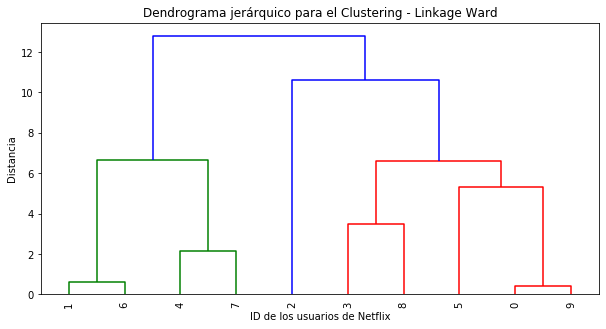

In [16]:
## Nos quedamos solo con aquellas variables con información relativa a al puntuación
movies = df_movies[['star_wars', 'lord_of_the_rings', 'harry_potter']]

## Definimos el tipo de nexo
link = linkage(movies, "ward")

## Graficamos el dendograma
plt.figure(figsize = (10, 5))
plt.title("Dendrograma jerárquico para el Clustering - Linkage Ward")
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancia")
dendrogram(link, leaf_rotation = 90., leaf_font_size = 10.0)
plt.show()

**Linkage: Average**

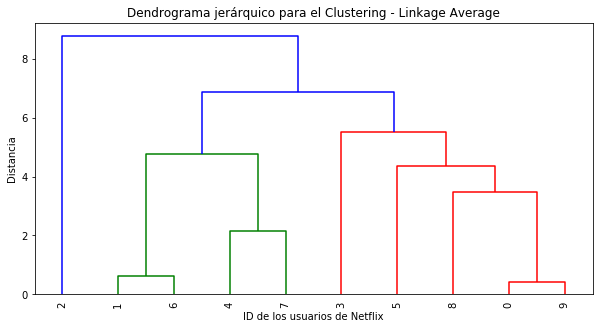

In [15]:
## Nos quedamos solo con aquellas variables con información relativa a al puntuación
movies = df_movies[['star_wars', 'lord_of_the_rings', 'harry_potter']]

## Definimos el tipo de nexo
link = linkage(movies, "average")

## Graficamos el dendograma
plt.figure(figsize = (10, 5))
plt.title("Dendrograma jerárquico para el Clustering - Linkage Average")
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancia")
dendrogram(link, leaf_rotation = 90.0, leaf_font_size = 10.0)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')  
cluster.fit_predict(X)

labels = cluster.labels_